In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [327]:

df = pd.read_csv('train.csv')

In [328]:
df.shape


(404289, 6)

In [329]:

df.head()



,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [330]:
new_df = df.sample(30000,random_state=2)

In [331]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [332]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
331534,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1
215843,215844,74845,151812,How many dimensions are there in our universe?,How many dimensions are reported to be existin...,1
157195,157196,21116,125684,What are the best horror movies?,What are the movies that everyone should watch?,0
294483,294484,5450,46047,What do you think about decision by the Indian...,Is Modi's decision on demonetization of 500 an...,1


In [333]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [334]:
new_df.duplicated().sum()

0

is_duplicate
0    18955
1    11045
Name: count, dtype: int64
is_duplicate
0    63.183333
1    36.816667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

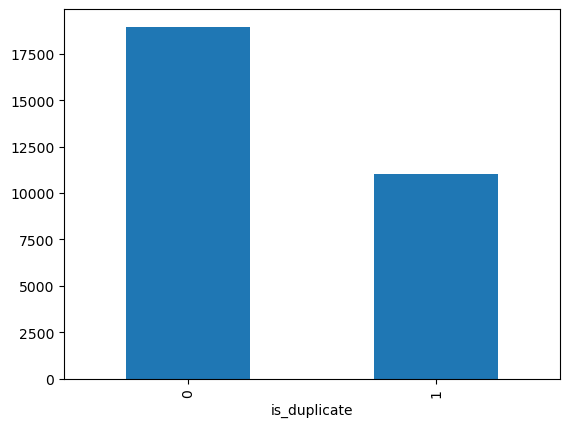

In [335]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [336]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55316
Number of questions getting repeated 3548


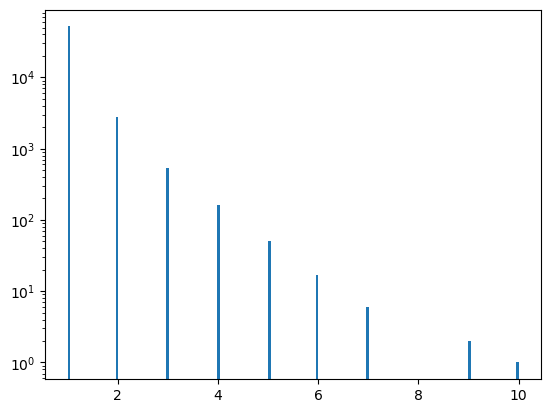

In [337]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [338]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [339]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
331534,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44
215843,215844,74845,151812,How many dimensions are there in our universe?,How many dimensions are reported to be existin...,1,46,64
157195,157196,21116,125684,What are the best horror movies?,What are the movies that everyone should watch?,0,32,47
294483,294484,5450,46047,What do you think about decision by the Indian...,Is Modi's decision on demonetization of 500 an...,1,97,78


In [340]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(str(row).split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(str(row).split(" ")))
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
331534,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7
215843,215844,74845,151812,How many dimensions are there in our universe?,How many dimensions are reported to be existin...,1,46,64,8,11
157195,157196,21116,125684,What are the best horror movies?,What are the movies that everyone should watch?,0,32,47,6,8
294483,294484,5450,46047,What do you think about decision by the Indian...,Is Modi's decision on demonetization of 500 an...,1,97,78,17,13


In [341]:

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [342]:
new_df['word_common'] = new_df.apply(common_words, axis=1)


In [343]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [344]:

new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
331534,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12
215843,215844,74845,151812,How many dimensions are there in our universe?,How many dimensions are reported to be existin...,1,46,64,8,11,7,19
157195,157196,21116,125684,What are the best horror movies?,What are the movies that everyone should watch?,0,32,47,6,8,3,14
294483,294484,5450,46047,What do you think about decision by the Indian...,Is Modi's decision on demonetization of 500 an...,1,97,78,17,13,5,30


In [345]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331534,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,0.33
215843,215844,74845,151812,How many dimensions are there in our universe?,How many dimensions are reported to be existin...,1,46,64,8,11,7,19,0.37
157195,157196,21116,125684,What are the best horror movies?,What are the movies that everyone should watch?,0,32,47,6,8,3,14,0.21
294483,294484,5450,46047,What do you think about decision by the Indian...,Is Modi's decision on demonetization of 500 an...,1,97,78,17,13,5,30,0.17


minimum characters 2
maximum characters 430
average num of characters 59


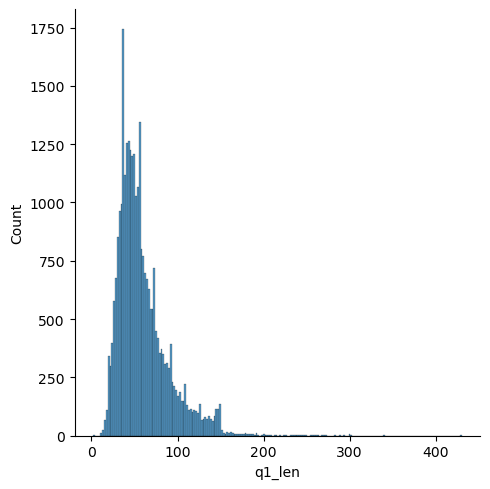

In [346]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 8
maximum characters 1151
average num of characters 60


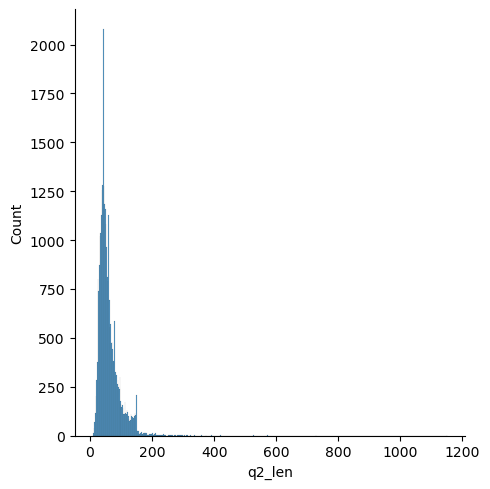

In [347]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 81
average num of words 10


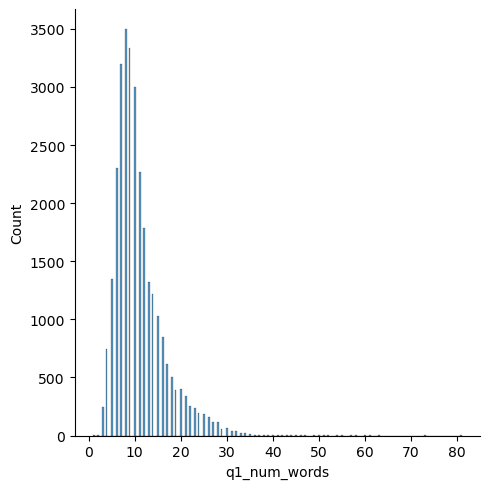

In [348]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


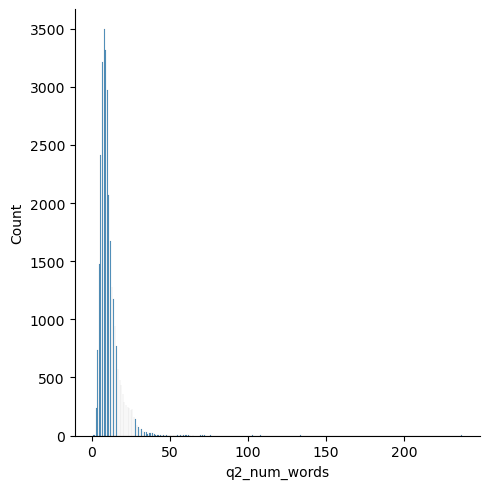

In [349]:

sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))


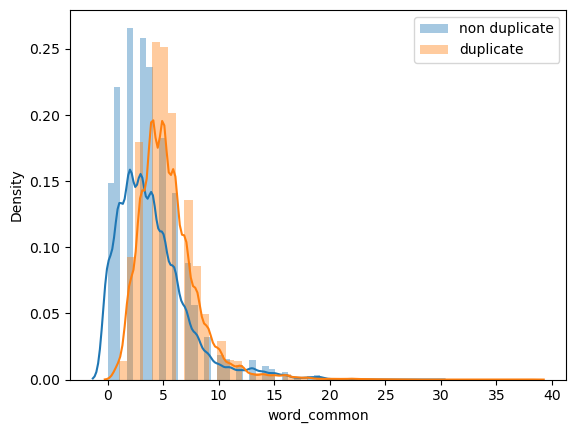

In [350]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

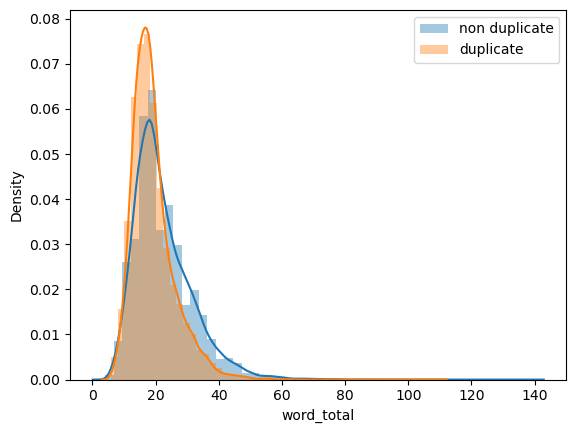

In [351]:

# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

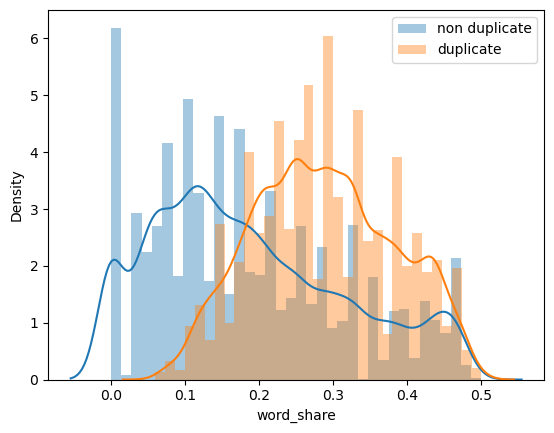

In [352]:

# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [353]:
ques_df = new_df[['question1','question2']]
ques_df.head()


,question1,question2
331534,How can I learn Norwegian?,What is the quickest way to learn Norwegian?
45407,How are currency rates determined?,Where and how are exchange rates determined?
215843,How many dimensions are there in our universe?,How many dimensions are reported to be existin...
157195,What are the best horror movies?,What are the movies that everyone should watch?
294483,What do you think about decision by the Indian...,Is Modi's decision on demonetization of 500 an...


In [354]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331534,1,26,44,5,8,2,13,0.15
45407,1,34,44,5,7,4,12,0.33
215843,1,46,64,8,11,7,19,0.37
157195,0,32,47,6,8,3,14,0.21
294483,1,97,78,17,13,5,30,0.17


In [355]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [356]:

temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [357]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
331534,1,26,44,5,8,2,13,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
45407,1,34,44,5,7,4,12,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
215843,1,46,64,8,11,7,19,0.37,0,0,...,0,0,0,0,0,0,0,0,0,0
157195,0,32,47,6,8,3,14,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
294483,1,97,78,17,13,5,30,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0


In [358]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [359]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7771666666666667

[[3391  425]
 [ 912 1272]]


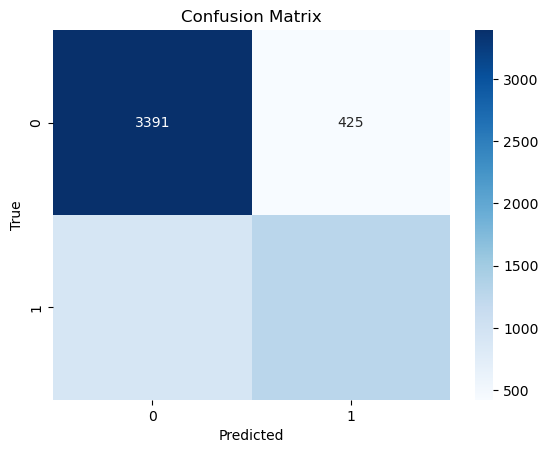

In [360]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [361]:
def query_point_creator(q1, q2):
    input_query = []
    
    q1_len = len(q1)
    q2_len = len(q2)
    q1_num_words = len(q1.split(" "))
    q2_num_words = len(q2.split(" "))
    
    input_query.append(q1_len)
    input_query.append(q2_len)
    input_query.append(q1_num_words)
    input_query.append(q2_num_words)
    
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    word_common = len(w1 & w2)
    word_total = len(w1) + len(w2)
    word_share = round(word_common / word_total, 2) if word_total != 0 else 0

    input_query.append(word_common)
    input_query.append(word_total)
    input_query.append(word_share)
    
    q1_bow = cv.transform([q1]).toarray()
    
    q2_bow = cv.transform([q2]).toarray()
    
    return np.hstack((np.array(input_query).reshape(1, 7), q1_bow, q2_bow))

In [362]:
q1="I was suddenly logged off Gmail. I can't remember my Gmail password and just realized the recovery email is no longer alive. What can I do?"
q2 ="I can't remember my Gmail password or my recovery email. How can I recover my e-mail?"

In [363]:
query_point_creator(q1,q2). shape

(1, 6007)

In [364]:
rf.predict(query_point_creator(q1,q2))

array([1])

In [365]:
cv


CountVectorizer(max_features=3000)

In [366]:
import pickle
pickle.dump(rf, open ('model.pkl', 'wb'))
pickle. dump (cv, open('cv.pkl', 'wb'))